In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

#stats
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#combine = [train, test]
#all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
#sns.distplot(train['SalePrice'])

In [7]:
#train["SalePrice"] = np.log1p(train["SalePrice"])

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

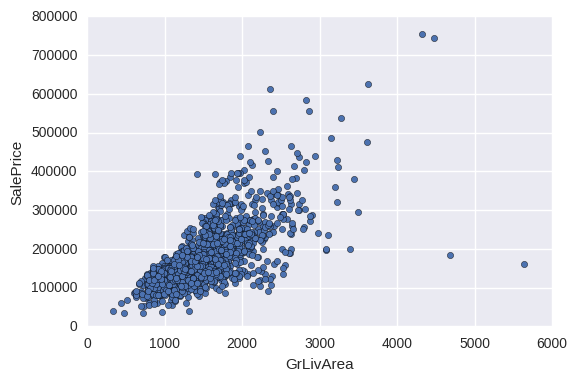

In [10]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [11]:
var = 'OverallQual'
train[var].describe()
#data = pd.concat([train['SalePrice'], train[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

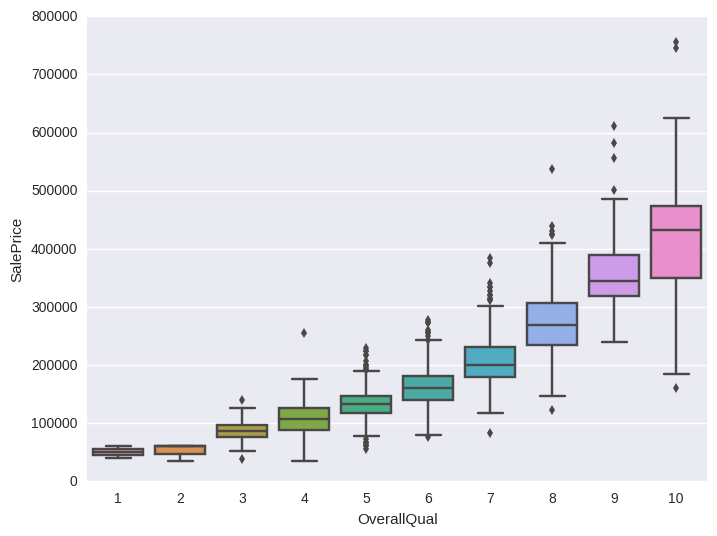

In [12]:
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

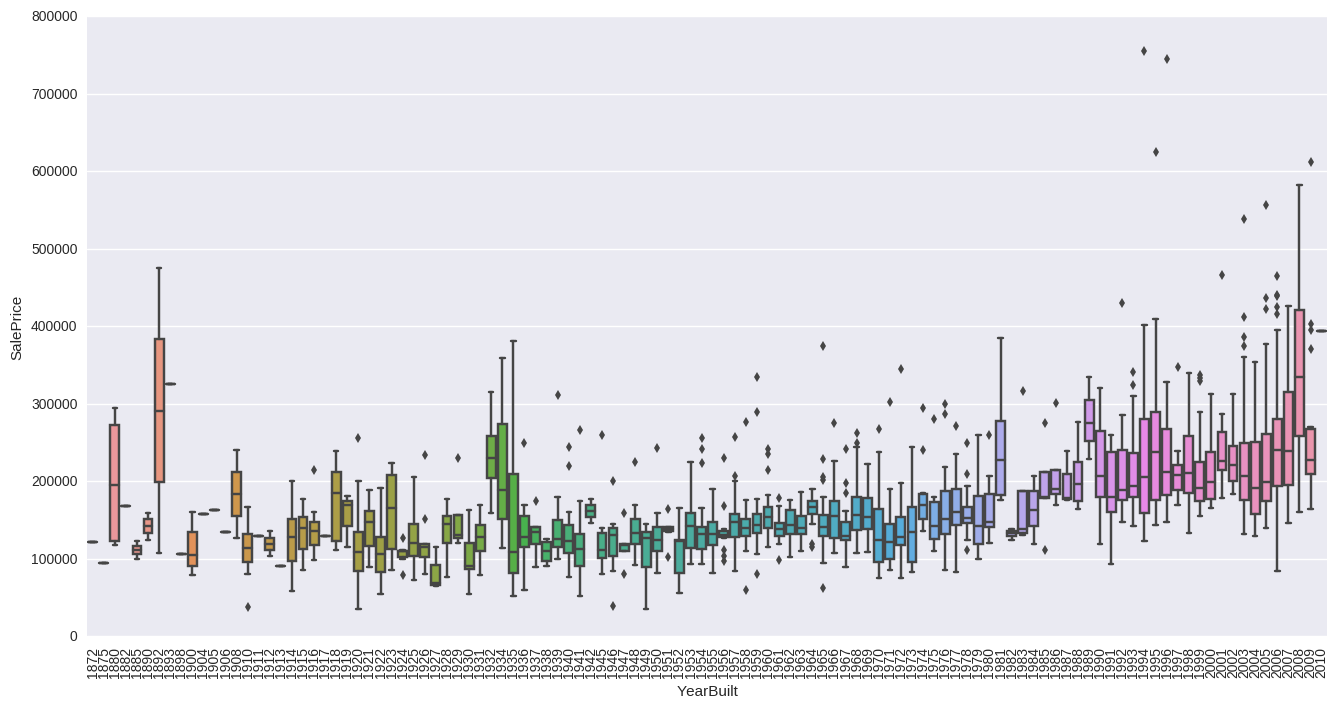

In [13]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

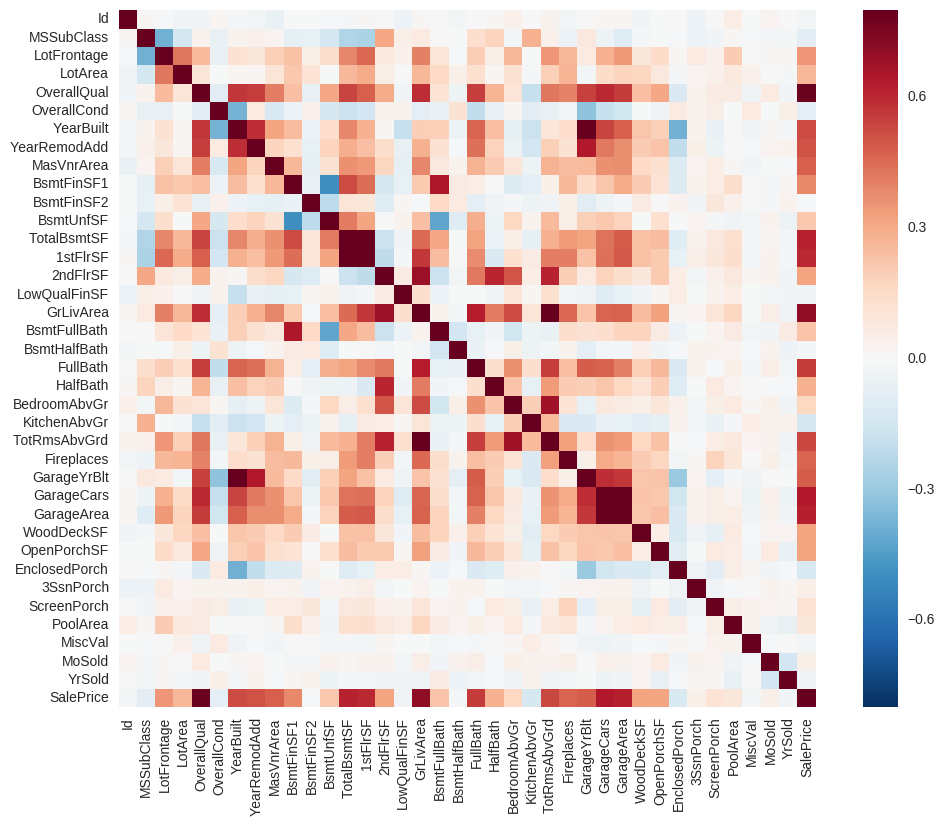

In [14]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

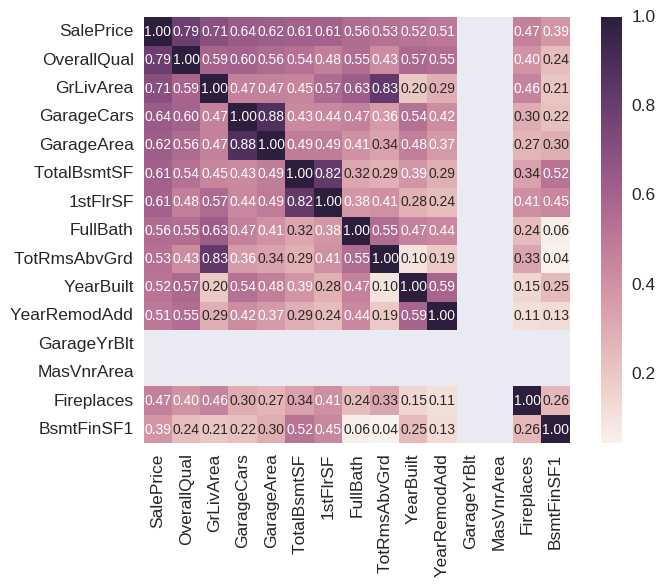

In [15]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
#scatterplot
#sns.set()
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
#sns.pairplot(train[cols], size = 3)
#plt.show();

In [17]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [18]:
missing_data_columns = missing_data[missing_data['Total'] > 1].index
#train['Electrical'].head()
index = train.loc[train['Electrical'].isnull()].index
train['Electrical'][index] = 'SBrkr'

In [19]:
train['Electrical'][index]

1379    SBrkr
Name: Electrical, dtype: object

In [20]:
#dealing with missing data
#df_train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train = train
df_train.isnull().sum().max() 
#total = df_train.isnull().sum().sort_values(ascending=False)
#total.head()
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Remove Outliner

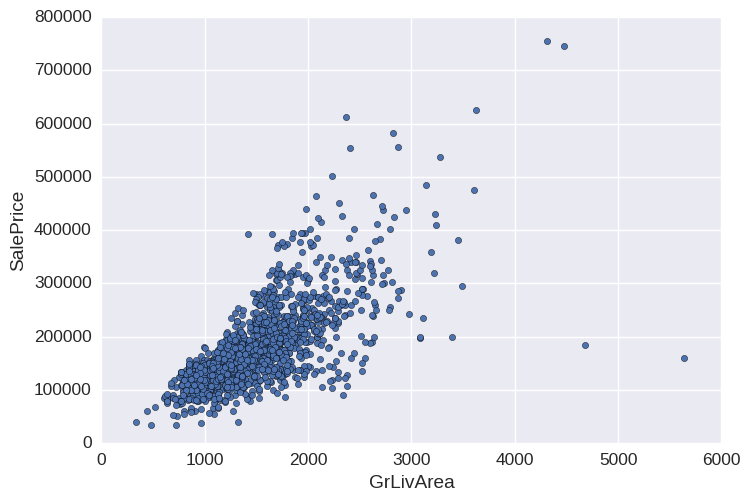

In [21]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [22]:
outliner = df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
#outliner.index
df_train = df_train.drop(outliner.index)
#outliner = df_train.sort_values(by = 'GrLivArea', ascending = False)[:1]
result = df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
result['GrLivArea'].head()

1182    4476
691     4316
Name: GrLivArea, dtype: int64

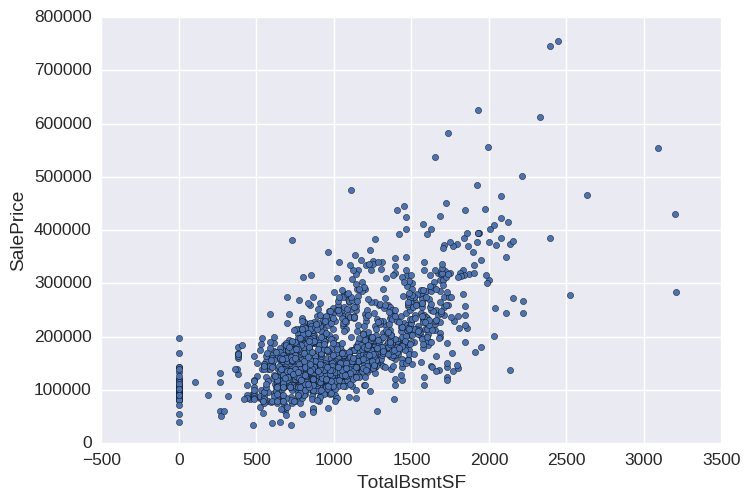

In [23]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [24]:
outliner = df_train.sort_values(by = 'TotalBsmtSF', ascending = False)[:3]
#outliner.index
df_train = df_train.drop(outliner.index)
#outliner = df_train.sort_values(by = 'GrLivArea', ascending = False)[:1]
result = df_train.sort_values(by = 'TotalBsmtSF', ascending = False)[:3]
result['TotalBsmtSF'].head()

1373    2633
1044    2524
691     2444
Name: TotalBsmtSF, dtype: int64

### Process data

In [25]:
all_data = pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))
all_data = all_data.drop(missing_data_columns,1)

In [26]:
all_data = all_data.drop(['YrSold', 'MoSold'], 1)

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 1458
Data columns (total 59 columns):
MSSubClass       2914 non-null int64
MSZoning         2910 non-null object
LotArea          2914 non-null int64
Street           2914 non-null object
LotShape         2914 non-null object
LandContour      2914 non-null object
Utilities        2912 non-null object
LotConfig        2914 non-null object
LandSlope        2914 non-null object
Neighborhood     2914 non-null object
Condition1       2914 non-null object
Condition2       2914 non-null object
BldgType         2914 non-null object
HouseStyle       2914 non-null object
OverallQual      2914 non-null int64
OverallCond      2914 non-null int64
YearBuilt        2914 non-null int64
YearRemodAdd     2914 non-null int64
RoofStyle        2914 non-null object
RoofMatl         2914 non-null object
Exterior1st      2913 non-null object
Exterior2nd      2913 non-null object
ExterQual        2914 non-null object
ExterCond        2914 non

In [28]:
#log transform skewed numeric features:
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [29]:
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [30]:
#creating matrices for sklearn:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
#y = df_train.SalePrice

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Columns: 217 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(208), int64(9)
memory usage: 2.4 MB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 217 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(208), int64(9)
memory usage: 2.4 MB


In [33]:
y = np.log1p(df_train["SalePrice"])

In [34]:
y.count()

1455

### Standardize some features

In [35]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_st = std_scale.transform(X_train)
X_test_st = std_scale.transform(X_test)

In [36]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,5,2003,2003,6.561031,0.0,5.017280,856.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,9.169623,6,8,1976,1976,6.886532,0.0,5.652489,1262.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,9.328212,7,5,2001,2002,6.188264,0.0,6.075346,920.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,9.164401,7,5,1915,1970,5.379897,0.0,6.293419,756.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,9.565284,8,5,2000,2000,6.486161,0.0,6.196444,1145.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
X_train_st.shape

(1455, 217)

In [38]:
#data transformation
#df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

#transformed histogram and normal probability plot
#sns.distplot(df_train['GrLivArea'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [39]:
#histogram and normal probability plot
#sns.distplot(df_train['TotalBsmtSF'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [40]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
#df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
#df_train['HasBsmt'] = 0 
#df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [41]:
#transform data
#df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [42]:
#histogram and normal probability plot
#sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [43]:
#data transformation
#df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])

#transformed histogram and normal probability plot
#sns.distplot(df_train['GrLivArea'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [44]:
#scatter plot
#plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [45]:
#scatter plot
#plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [46]:
#df_train.head(1)

In [47]:
#convert categorical variable into dummy
#df_train = pd.get_dummies(df_train)
#df_train.head(1)

In [48]:
# Kernal Link: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

### Model

In [49]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [113]:
model_ridge = Ridge()

In [114]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

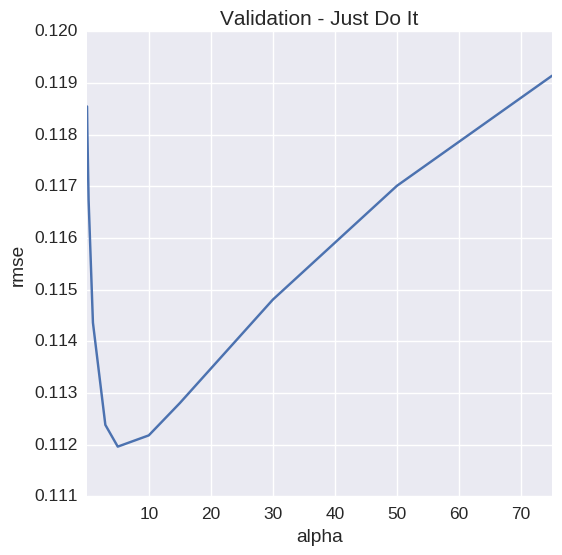

In [115]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [116]:
cv_ridge.min()

0.11196205418351465

In [119]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train_st, y)

In [120]:
rmse_cv(model_lasso).mean()

0.1104217908458484

In [123]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 148 variables and eliminated the other 69 variables


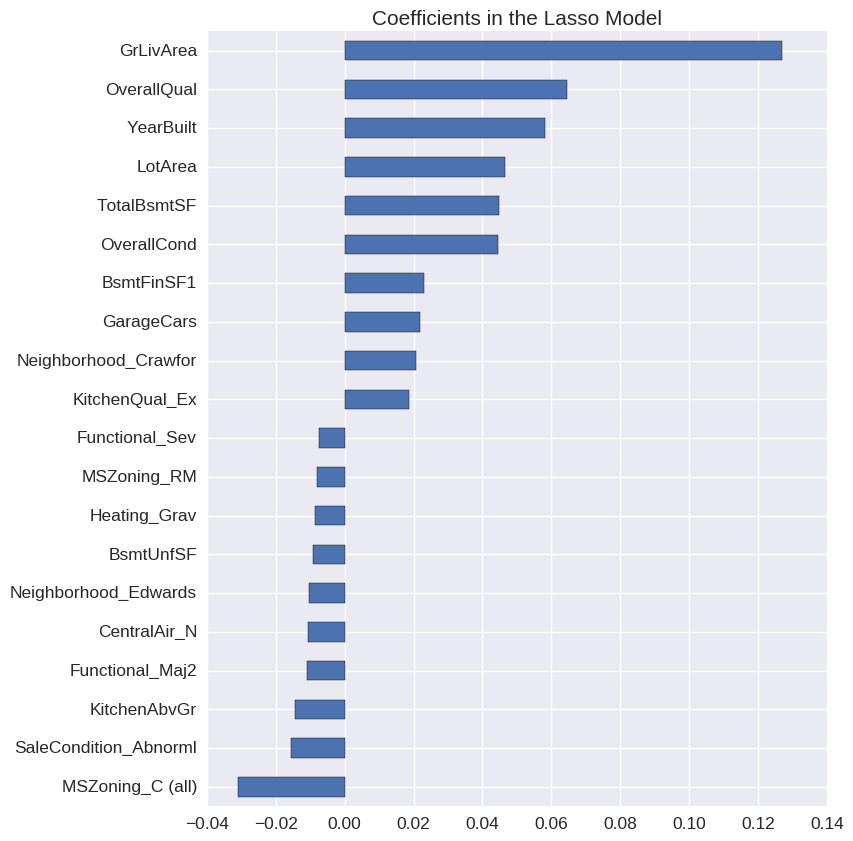

In [124]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

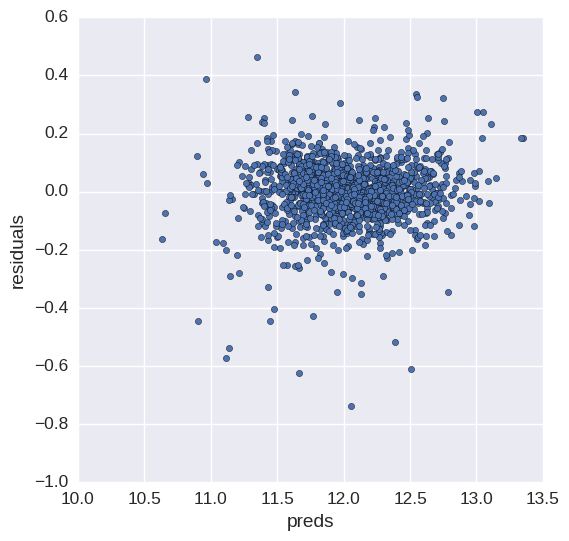

In [58]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [125]:
lasso_preds = np.expm1(model_lasso.predict(X_test_st))

In [126]:
preds = lasso_preds

In [127]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("lasso_sol.csv", index = False)

In [128]:
model_ridge.fit(X_train_st, y)
ridge_preds = np.expm1(model_ridge.predict(X_test_st))

In [129]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

### Gradient Boosting

In [103]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y, test_size = 0.2, random_state = 200)

In [104]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3000)
gbrt.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [105]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators=np.argmin(errors)

In [106]:
gbrt_best = GradientBoostingRegressor(max_depth=3, n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=299,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [107]:
gbrt_preds = np.expm1(gbrt_best.predict(X_test))

In [108]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":gbrt_preds})
solution.to_csv("gbrt_sol.csv", index = False)

,R Square Score
Bayesian Ridge,0.919818
Ridge,0.917597
Lasso,0.917533
Linear,0.911326
Hubber,0.818593


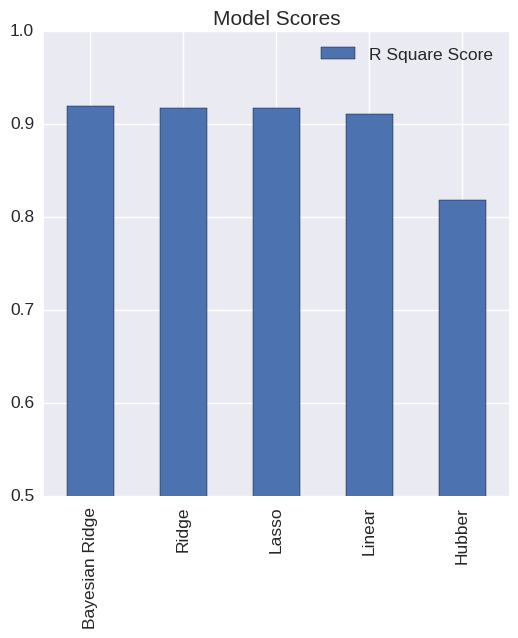

In [70]:
# R2 Score

def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
   
    #clf = BaggingRegressor()
    #results["Bagging"]=test_model(clf)
    
    #clf = RandomForestRegressor()
    #results["RandomForest"]=test_model(clf)
    
    #clf = AdaBoostRegressor()
    #results["AdaBoost"]=test_model(clf)
    
    #clf = svm.SVR()
    #results["SVM RBF"]=test_model(clf)
    
    #clf = svm.SVR(kernel="linear")
    #results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(X_train,y)

In [71]:
cv = KFold(n_splits=5,shuffle=True,random_state=45)

parameters = {'alpha_1': [1e-7,1e-6,1e-5],
              'alpha_2': [1e-7,1e-6,1e-5],
              'lambda_1': [1e-7,1e-6,1e-5],
              'lambda_2': [1e-7,1e-6,1e-5],
              'tol' : [1e-3, 1e-4, 1e-5]}

clf = linear_model.BayesianRidge()
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)
grid_fit = grid_obj.fit(X_train, y)
best_clf = grid_fit.best_estimator_ 

best_clf.fit(X_train,y)

BayesianRidge(alpha_1=1e-05, alpha_2=1e-07, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-07, lambda_2=1e-05, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [72]:
predictions_BayesianRidge = np.expm1(best_clf.predict(X_test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":predictions_BayesianRidge})
solution.to_csv("bayesianRidge_sol.csv", index = False)

### simple neural network

In [78]:
np_train = np.array(X_train) #!!!!!we have to convert the data to np array, otherwise we got exception
np_y = np.array(y) #!!! from https://github.com/tflearn/tflearn/issues/392
labels_nl = np_y
labels_nl = labels_nl.reshape(-1,1)

In [79]:
import tflearn
import tensorflow as tf
train = np_train
tf.reset_default_graph()
r2 = tflearn.R2()
net = tflearn.input_data(shape=[None, np_train.shape[1]])
net = tflearn.fully_connected(net, 30, activation='linear')
net = tflearn.fully_connected(net, 10, activation='linear')
net = tflearn.fully_connected(net, 1, activation='linear')
sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.01, decay_step=100)
net = tflearn.regression(net, optimizer=sgd,loss='mean_square',metric=r2)
model = tflearn.DNN(net)

In [80]:
labels_nl.shape

(1455, 1)

In [81]:
train.shape[1]

217

In [82]:
model.fit(train, labels_nl,show_metric=True,validation_set=0.2,shuffle=True,n_epoch=50)

Training Step: 949  | total loss: 0.05179 | time: 0.219s
| SGD | epoch: 050 | loss: 0.05179 - R2: 0.9999 -- iter: 1152/1164
Training Step: 950  | total loss: 0.05178 | time: 1.247s
| SGD | epoch: 050 | loss: 0.05178 - R2: 1.0006 | val_loss: 0.05670 - val_acc: 1.0031 -- iter: 1164/1164
--


In [84]:
predictions_DNN = model.predict(X_test)
predictions_DNN = np.expm1(predictions_DNN)
predictions_DNN = predictions_DNN.reshape(-1,)
solution = pd.DataFrame({"id":test.Id, "SalePrice":predictions_DNN})
solution.to_csv("DNN_sol.csv", index = False)

### Elastic Net

In [94]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))
# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)
    
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(X_train_st, y, test_size=0.1, random_state=200)
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.9342384129432573
RMSE: 0.09813747889121195
Test
R2: 0.9090553546127851
RMSE: 0.09830956686674226


In [96]:
ENST_model = ENSTest.fit(X_train_st, y)

In [101]:
predictions_EN_st = np.expm1(ENST_model.predict(X_test_st))
solution = pd.DataFrame({"id":test.Id, "SalePrice":predictions_EN_st})
solution.to_csv("EN_st_sol.csv", index = False)

In [111]:
Ensemble_labels = (np.expm1(gbrt_best.predict(X_test)) + np.exp(ENST_model.predict(X_test_st))) / 2

In [112]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":Ensemble_labels})
solution.to_csv("Ensemble_sol.csv", index = False)

### XGBoost

In [39]:
import xgboost as xgb
regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(X_train_st, y)

# Run prediction on training set to get a rough idea of how well it does.
#y_pred = regr.predict(X_train_st)
#y_test = y
#print("XGBoost score on training set: ", rmse(y_test, y_pred))

# Run prediction on the Kaggle test set.
predictions_XGBoost_st = np.expm1(regr.predict(X_test_st))
solution = pd.DataFrame({"id":test.Id, "SalePrice":predictions_XGBoost_st})
solution.to_csv("XGBoost_st_sol.csv", index = False)

In [1]:
X_train_st

NameError: name 'X_train_st' is not defined